In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
import matplotlib.patches as patches

def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")
    
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def show_image_with_corners(image, coords, title="Cornersdetected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    for patch in detected:
        img_desc.add_patch( patches.Rectangle((patch['c'],patch['r']),patch['width'],patch['height'],color='r',linewidth=2))
    plt.show()

    
cap = cv2.VideoCapture(r'D:\\video.mp4')
frame_index = 200 
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = cap.read()

if ret:
    fig = plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

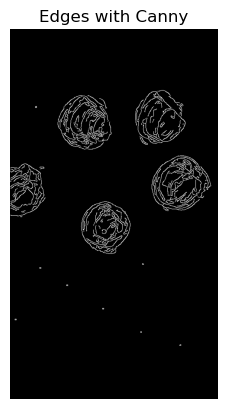

In [20]:
#Bài tập 4.1: Tìm cạnh với thuật toán Canny

# Tải các thư viện cần thiết
from skimage.feature import canny
# chuyển đổi ảnh thành ảnh xám
gray_image = color.rgb2gray(frame)
# Áp dụng bộ lọc cạnh
canny_edges = canny(gray_image)
# Hiển thị kết quả
show_image(canny_edges, "Edges with Canny")


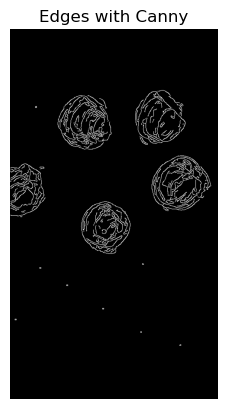

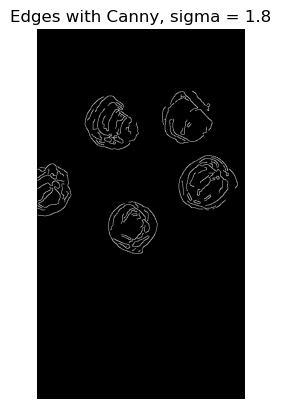

In [21]:
#Bài tập 4.2: Khảo sát ảnh hưởng của việc lọc nhiễu lên bộ lọc phát hiện cạnh

# Ứng dụng phát hiện cạnh với sigma =1.8

canny_edges_1 = canny(gray_image, sigma=1.8)

show_image(canny_edges, "Edges with Canny")
show_image(canny_edges_1, "Edges with Canny, sigma = 1.8")

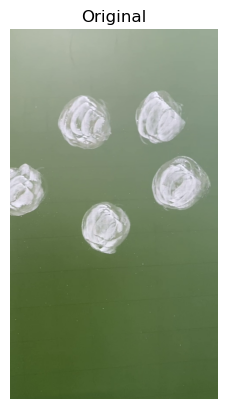

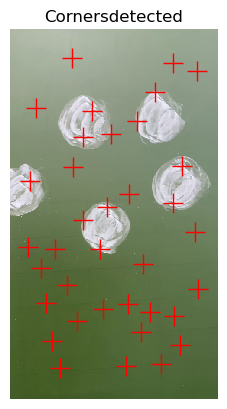

In [22]:
#Bài tập 4.3: Phát hiện góc bằng bộ lọc Harris

# Khai báo các thư viện cần thiết
from skimage.feature import corner_harris, corner_peaks
# Ứng dụng bộ lọc Harris để xác định các góc có khả năng:
measure_image = corner_harris(gray_image)
# Tìm đỉnh của các góc dựa trên đáp ứng của bộ lọc Harris
coords = corner_peaks(measure_image, min_distance=40)
# Hiển thị kết quả và so sánh 
show_image(frame, "Original")
show_image_with_corners(frame, coords)


In [23]:
#Bài tập 4.4: Khảo sát ảnh hưởng của tham số min_distance trong việc phát hiện góc

# Thay đổi tham số điều khiển min_distance và quan sát số lượng các góc có thể tìm được
min_distance = 40

coords_w_min_2 = corner_peaks(measure_image, min_distance=min_distance)
print("With a min_distance set to " + str(min_distance) + " we detect a total " + str(len(coords_w_min_2)) + " corners in the image.")

With a min_distance set to 40 we detect a total 36 corners in the image.


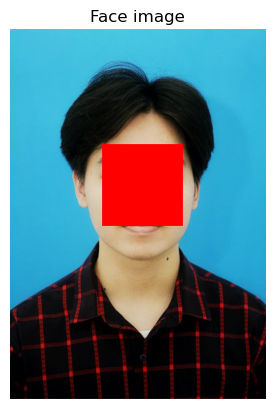

Detected face: [{'r': 203, 'c': 163, 'width': 138, 'height': 138}]


In [24]:
#Bài tập 4.5: Nhận diện khuôn mặt

from skimage.feature import Cascade
from skimage import data

image = plt.imread(r'D:\New Volume\Profile\anh the.jpg')
# Tải mô hình đã được huấn luyện sẵn
trained_file = data.lbp_frontal_face_cascade_filename()
# khởi tạo đối tượng phát hiện khuôn mặt
detector = Cascade(trained_file)
# Thay đổi các tham số điều khiển giá trị lớn nhất và giá trị nhỏ nhất của khuôn mặt và đánh giá sự thay đổi
detected = detector.detect_multi_scale(img = image, scale_factor=1.2, step_ratio=1,min_size=(10,10), max_size=(200,200))
# Hiển thị kết quả.
show_detected_face(image, detected)
print("Detected face:", detected)


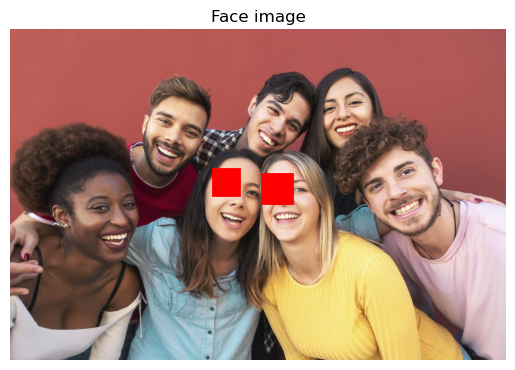

Detected face: [{'r': 576, 'c': 836, 'width': 108, 'height': 108}, {'r': 595, 'c': 1041, 'width': 122, 'height': 122}]


In [29]:
#Bài tập 4.6: Nhận dạng nhiều khuôn mặt

image1 = plt.imread(r"D:\human.jpg")
# Tải mô hình đã được huấn luyện sẵn
trained_file = data.lbp_frontal_face_cascade_filename()
# khởi tạo đối tượng phát hiện khuôn mặt
detector = Cascade(trained_file)
# Thay đổi các tham số điều khiển giá trị lớn nhất và giá trị nhỏ nhất của khuôn mặt và đánh giá sự thay đổi
detected = detector.detect_multi_scale(img = image1, scale_factor=1.2,step_ratio=1, min_size=(10, 10), max_size=(200, 200))
# Hiển thị kết quả.
show_detected_face(image1, detected)
print("Detected face:", detected)
